In [31]:
file=open('cleanfilecric.csv','r')
filecontents = [i.strip().split('\n') for i in file]
file.close()
filecontents[0]

['text']

In [32]:
filecontents[0]

['text']

In [33]:
from textblob import TextBlob 

In [34]:
wpol = [[i,TextBlob(i[0]).sentiment.polarity] for i in filecontents]
wpol

[[['text'], 0.0],
 [['ranveerofficial what a song apna time ayega gully boy movie will be super hit because  actor is ranveer'],
  0.3333333333333333],
 [['googlemaps dont jst get lostkeep updating ur gully_boy ncoz its changing everywheren new gully everydayx8cx8dx8cx8fx8cx8ex98x89'],
  0.13636363636363635],
 [['paytmtickets excelmovies cause im gully boy'], 0.0],
 [['one advice to twitter janta who havent yet watched the original divine/naezy gully boy video dontnranveers good too x98xacngullyboy'],
  0.5375],
 [['indomitablervs to be very honest for me its gully boy trailer its addictive'],
  0.39],
 [['ranveerofficial  sir is gully boy the plagiarized version of 8 mile'],
  0.0],
 [['gully boy ranveer singhs street smart rap song mere gully mein is foot-tappingx94watch'],
  -0.14285714285714285],
 [['the fast bowler from x9cinside edgex9d is one of the leads with ranveer singh in gully boy'],
  0.2],
 [['when serena had the boy working out every day trying to keep upx98x82x98x82x98

In [35]:
neg = [i for i,j in wpol if j<0] 
#neu = [i for i,j in wpol if j==0] 
pos = [i for i,j in wpol if j>0] 

In [36]:
sentiments= [len(neg),len(pos)]

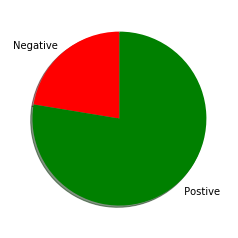

In [37]:
import matplotlib.pyplot as plt
labels = 'Negative',' Postive'
fig1, ax1 = plt.subplots()
ax1.pie(sentiments, labels=labels,colors=['r','g'],
        shadow=True, startangle=90)
plt.title=('Sentiment Analysis')
plt.show()

In [38]:
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk import sent_tokenize, word_tokenize
from wordcloud import WordCloud, STOPWORDS
from collections import Counter
from nltk.tokenize import RegexpTokenizer

In [39]:
def wc(data,bgcolor,title):
    plt.figure(figsize = (100,100))
    wc = WordCloud(background_color = bgcolor, max_words = 1000,  max_font_size = 50)
    wc.generate(' '.join(data))
    plt.imshow(wc)
    plt.axis('off')

In [40]:
import nltk
nltk.download('stopwords')
from stop_words import get_stop_words
stop_words = list(get_stop_words('en'))         
nltk_words = list(stopwords.words('english'))   
stop_words.extend(nltk_words)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mukul\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [41]:
word_tokens = [word_tokenize(i[0][0]) for i in wpol]

In [42]:
filtered_sentence = [w for w in word_tokens if not w in stop_words]

In [43]:
# Remove characters which have length less than 2  
without_single_chr = [word for word in filtered_sentence if len(word) > 2]


In [44]:
filtered_sentence1=[]

for i in range(len(filtered_sentence)):
    for j in filtered_sentence[i]:
        filtered_sentence1.append(j)

In [45]:
without_single_chr = [word for word in filtered_sentence1 if len(word) > 2]

In [46]:
# Remove numbers
cleaned_data_title = [word for word in without_single_chr if not word.isnumeric()] 


In [47]:
cleaned_data_title1 = [cleaned_data_title[i] for i in range(len(cleaned_data_title)) if cleaned_data_title[i] not in ["gully","boy","official","ranveer","speakerpelosi","ranveerofficial","don_gully","mavado","mavado_gully","x98x82","senschumer"]
                       and 'http' not in stop_words 
 and not cleaned_data_title[i].startswith('@')
 and not cleaned_data_title[i].startswith('#')
 and cleaned_data_title[i] != 'RT' and cleaned_data_title[i] not in ["trailer"]
]

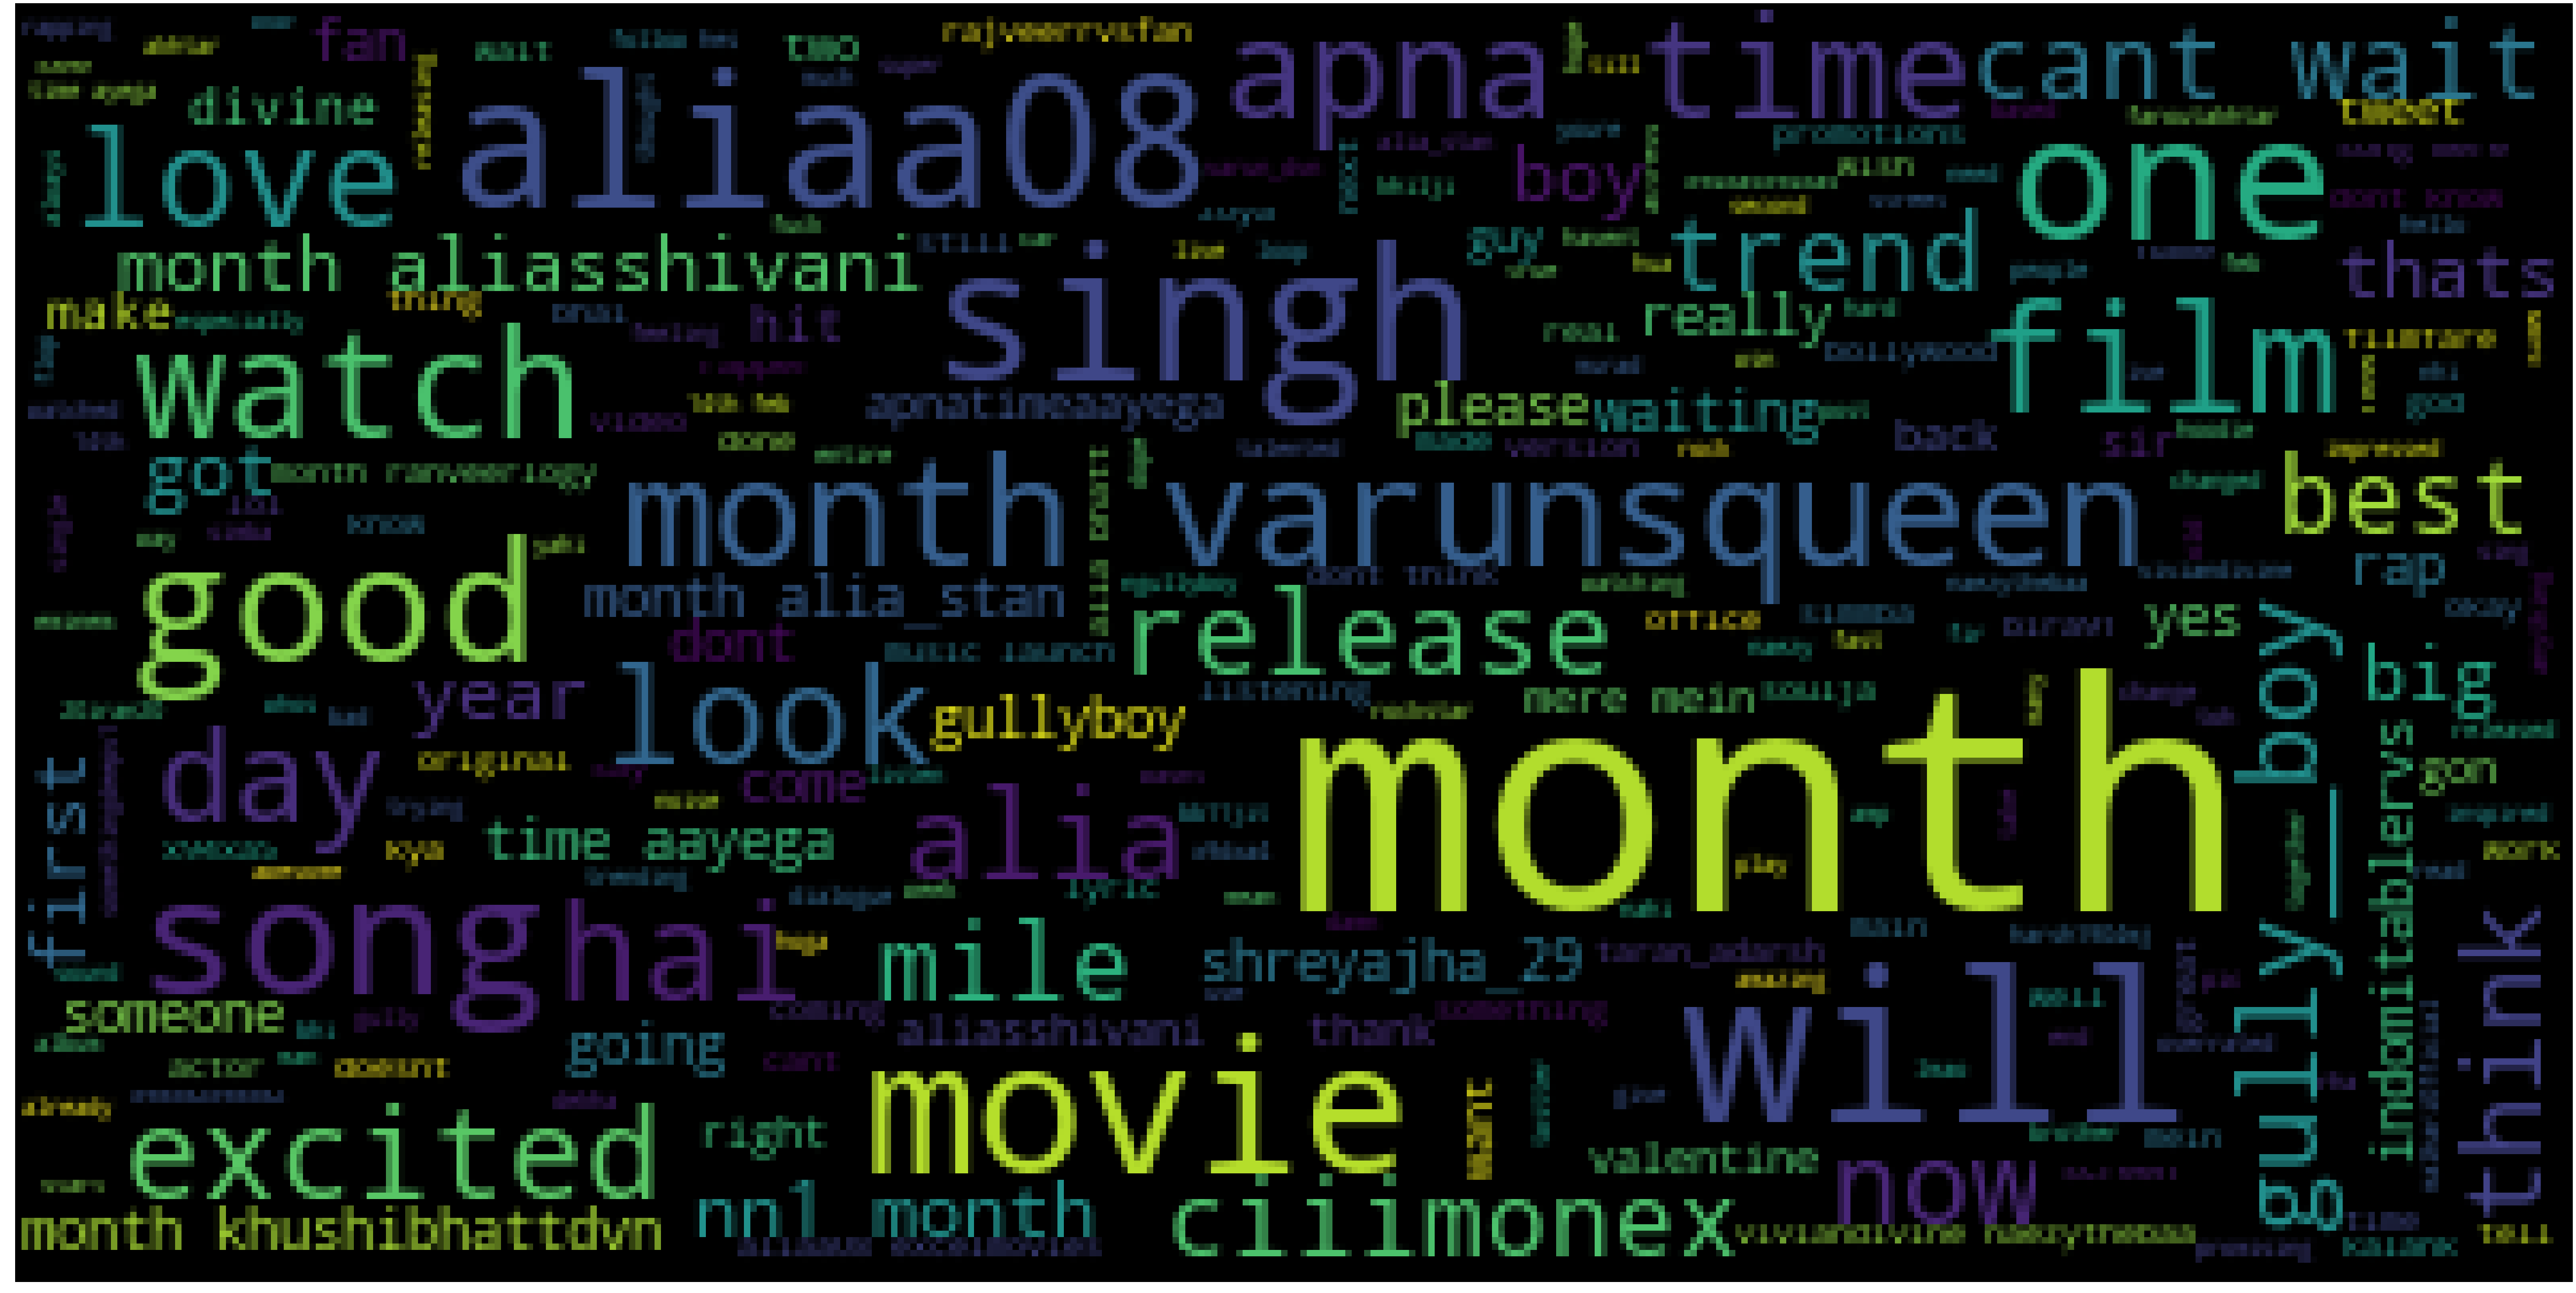

In [48]:
wc(cleaned_data_title1,'black','Common Words' )

In [49]:
baselist = [[TextBlob(i).sentiment.polarity,i] for i in cleaned_data_title1]

In [50]:
postive = [j for i,j in baselist if i>0]
negative = [j for i,j in baselist if i<0]

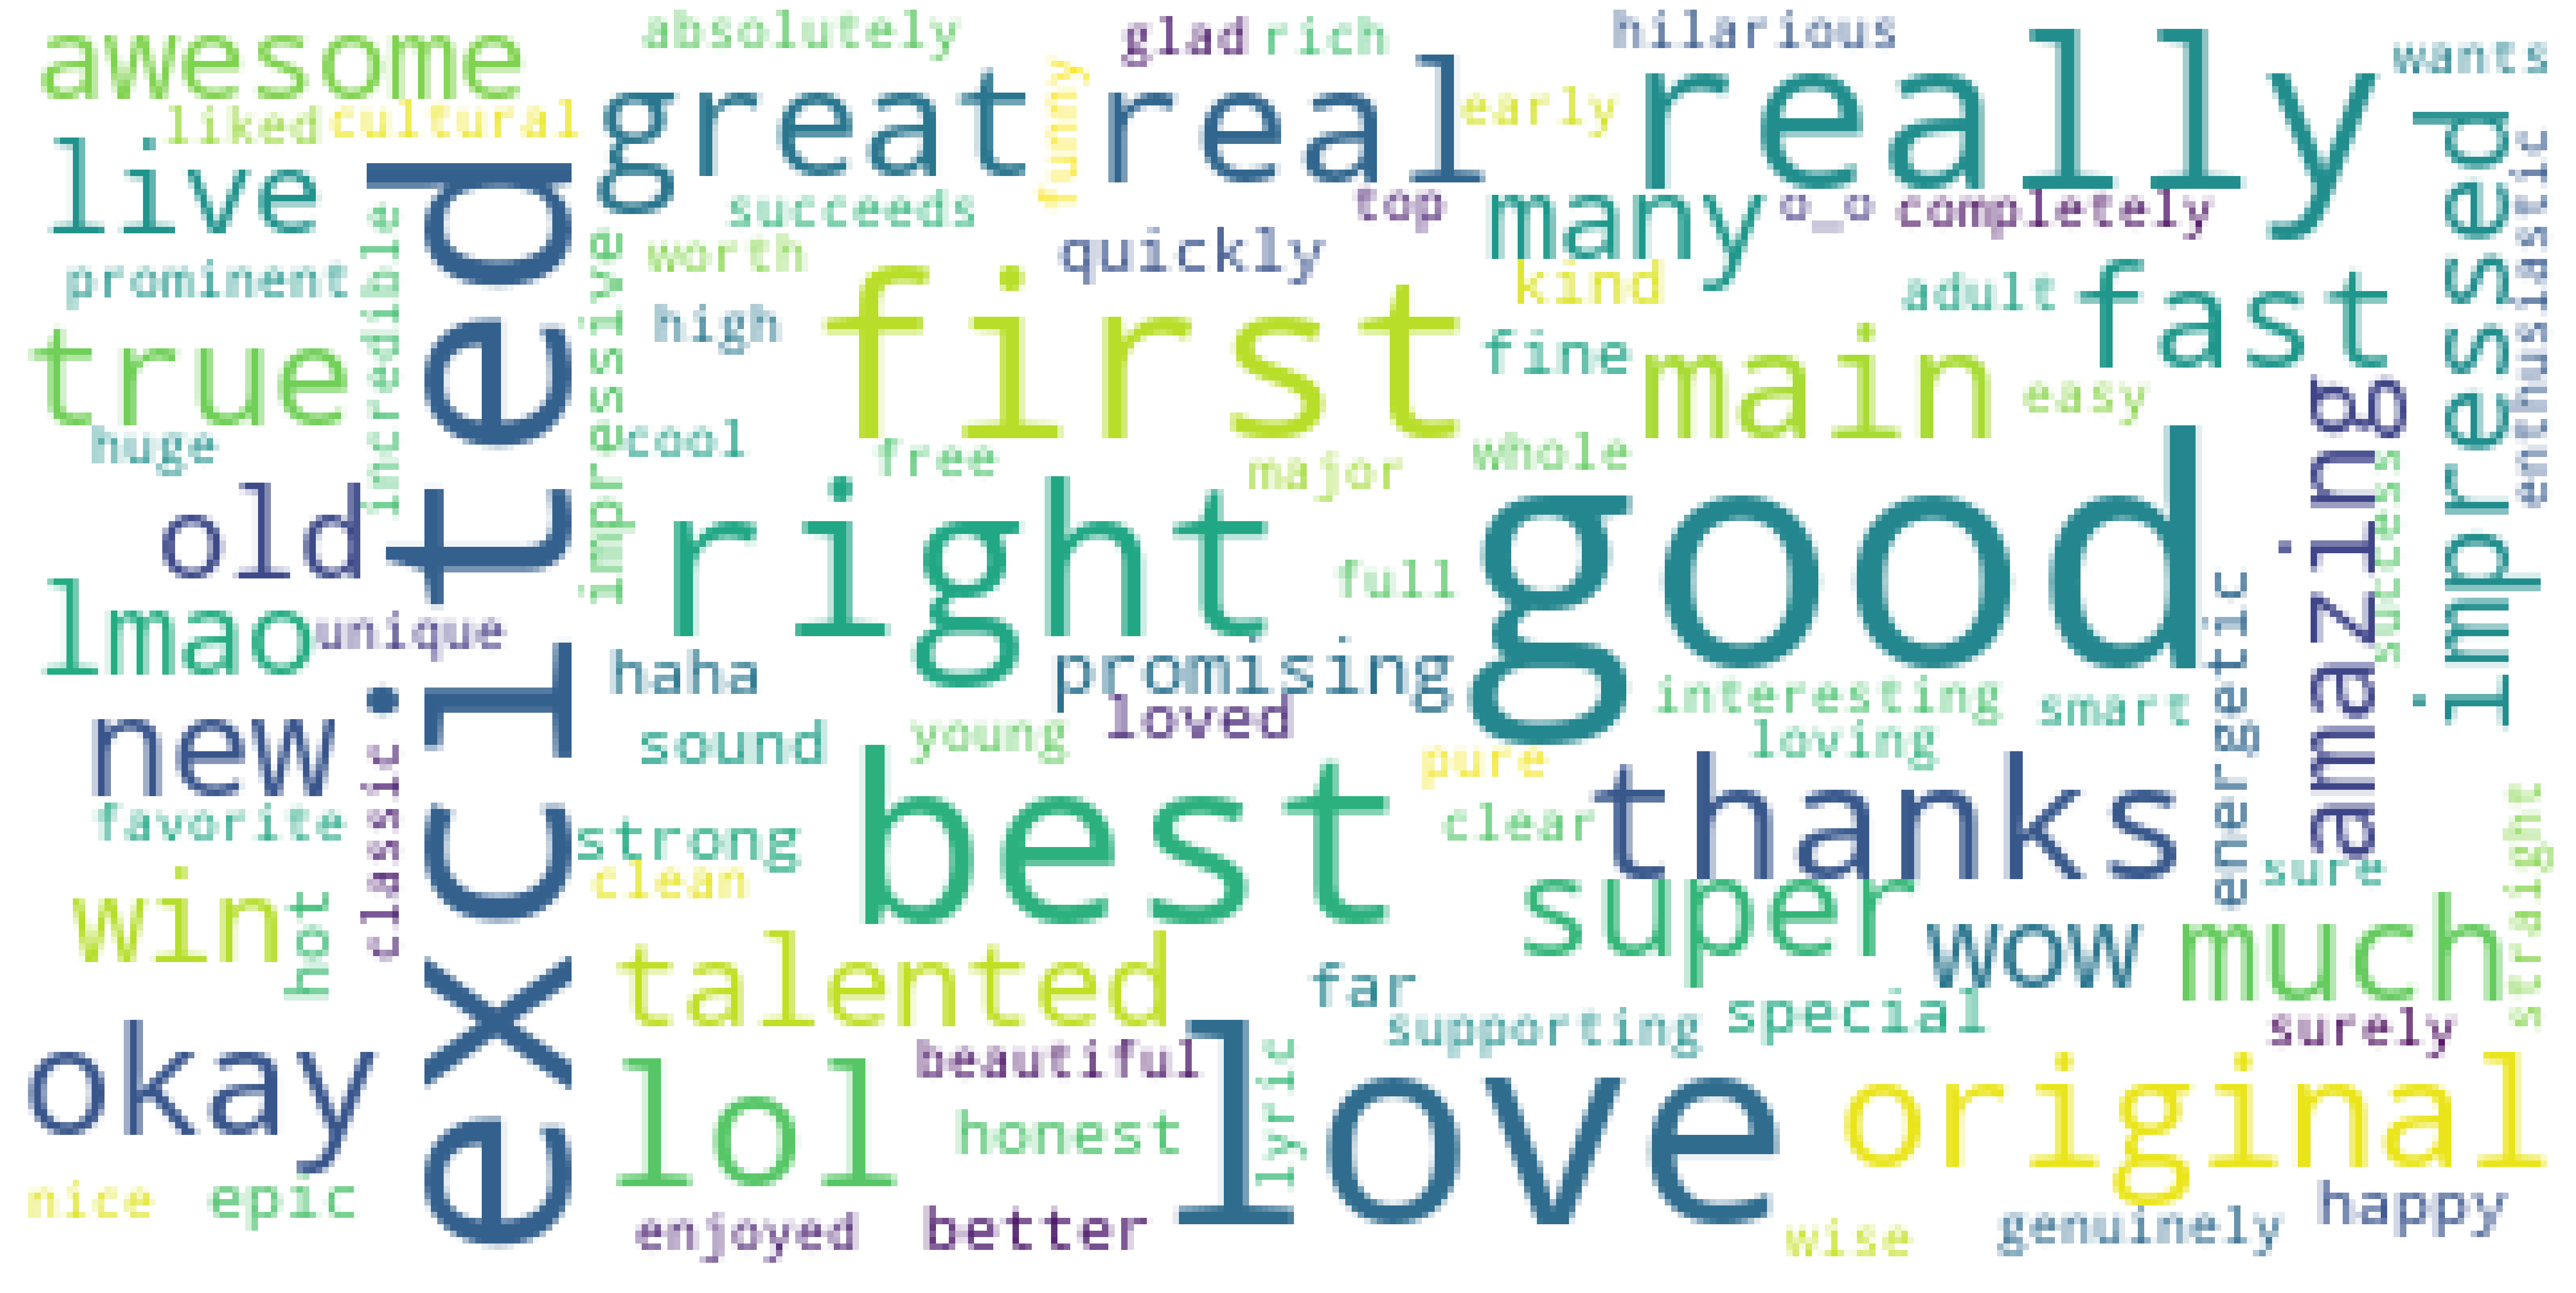

In [51]:
wc(postive,'white','Common Words' )

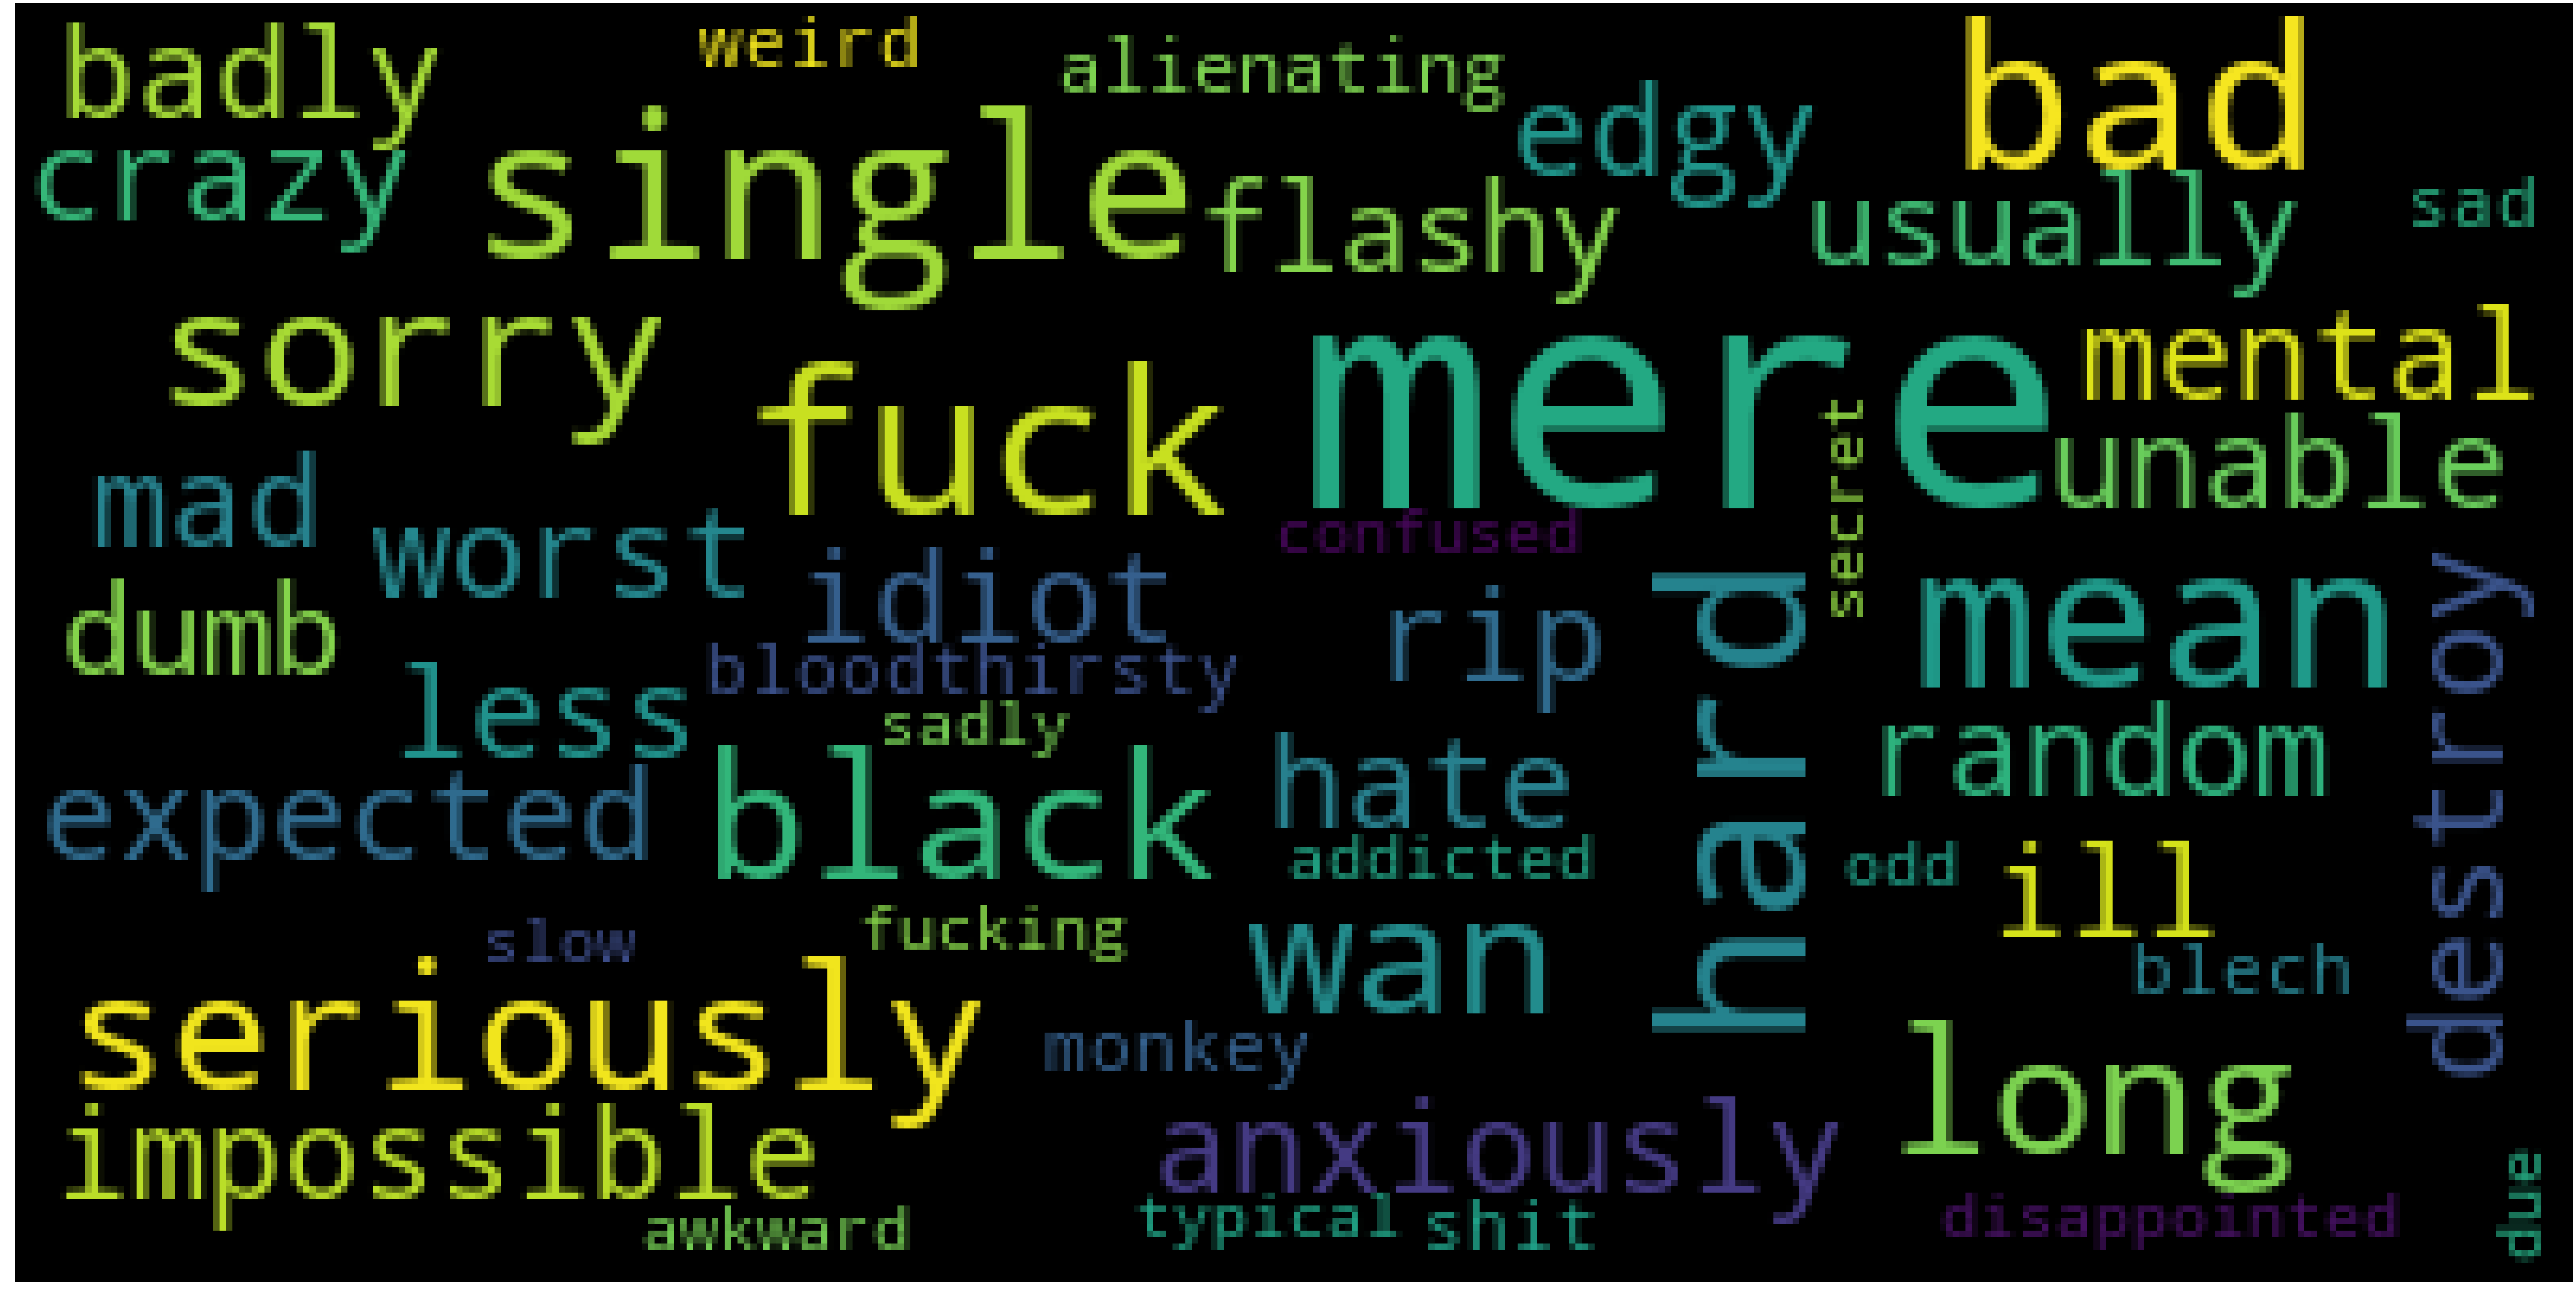

In [52]:
wc(negative,'black','Common Words' )